<a href="https://colab.research.google.com/github/harsh-076/Exploratory-data-analysis-/blob/main/edada1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comprehensive Data Analysis and Model Development

In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Load the dataset
file_path = '/content/winemag-data-130k-v2 (1).csv'
data = pd.read_csv(file_path)

# Create a copy of the data for processing
data_copy = data.copy()

# Display the first few rows of the dataset
print("Dataset Loaded:")
print(data_copy.head())


Dataset Loaded:
   id   country                                        description  \
0   0     Italy  Aromas include tropical fruit, broom, brimston...   
1   1  Portugal  This is ripe and fruity, a wine that is smooth...   
2   2        US  Tart and snappy, the flavors of lime flesh and...   
3   3        US  Pineapple rind, lemon pith and orange blossom ...   
4   4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN      

## 1. Data Deduplication and Handling Missing Data

In [ ]:

# Remove duplicate rows
data_copy = data_copy.drop_duplicates()
print(f"Number of rows after deduplication: {len(data_copy)}")

# Handle missing values using mean imputation for numeric columns
numeric_columns = data_copy.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
data_copy[numeric_columns] = imputer.fit_transform(data_copy[numeric_columns])
print("Missing values in numeric columns handled using mean imputation.")

# Handle missing values using mode imputation for categorical columns
categorical_columns = data_copy.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
data_copy[categorical_columns] = imputer_cat.fit_transform(data_copy[categorical_columns])
print("Missing values in categorical columns handled using mode imputation.")


Number of rows after deduplication: 129971
Missing values in numeric columns handled using mean imputation.
Missing values in categorical columns handled using mode imputation.


## 2. Data Transformation: Discretization and Binning

In [ ]:

# Discretize 'points' into bins
kbin = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
data_copy['points_binned'] = kbin.fit_transform(data_copy[['points']])
print("Discretization applied to 'points':")
print(data_copy[['points', 'points_binned']].head())


Discretization applied to 'points':
   points  points_binned
0    87.0            1.0
1    87.0            1.0
2    87.0            1.0
3    87.0            1.0
4    87.0            1.0


## 3. Statistical Analysis

Univariate Analysis of Price:
count    129971.000000
mean         35.363389
std          39.577066
min           4.000000
25%          18.000000
50%          28.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64
Correlation Matrix:
          points     price
points  1.000000  0.402137
price   0.402137  1.000000
Displaying pair plot for 'points' and 'price':


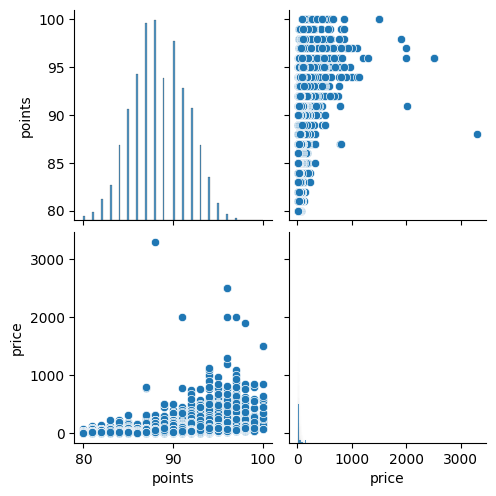

In [ ]:

# Univariate analysis (example on 'price')
price_desc = data_copy['price'].describe()
print("Univariate Analysis of Price:")
print(price_desc)

# Bivariate analysis (correlation between 'points' and 'price')
correlation_matrix = data_copy[['points', 'price']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Multivariate analysis (pair plot)
print("Displaying pair plot for 'points' and 'price':")
sns.pairplot(data_copy[['points', 'price']])
plt.show()


## 4. Visualization

Scatter plot for 'price' vs 'points':


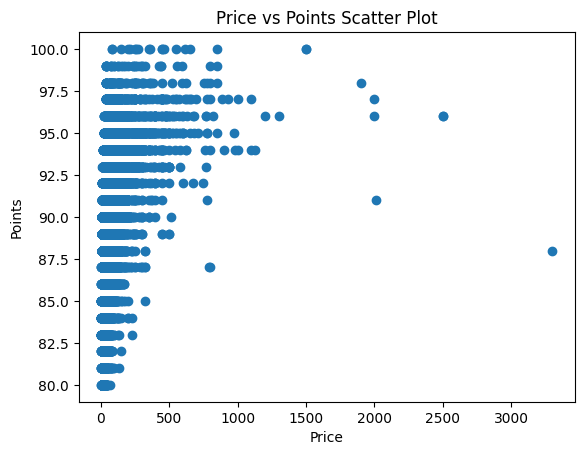

Bar plot for top 10 countries by count:


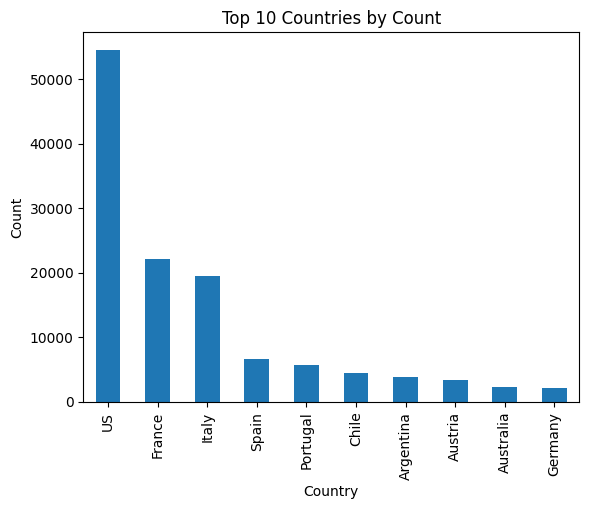

In [ ]:

# Scatter plot for 'price' vs 'points'
print("Scatter plot for 'price' vs 'points':")
plt.scatter(data_copy['price'], data_copy['points'])
plt.xlabel('Price')
plt.ylabel('Points')
plt.title('Price vs Points Scatter Plot')
plt.show()

# Bar plot for 'country' counts
print("Bar plot for top 10 countries by count:")
data_copy['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries by Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


## 5. Clustering Algorithms

In [ ]:

# Sampling the dataset to reduce size for clustering
sampled_data = data_copy.sample(n=5000, random_state=42)
print(f"Sampled {len(sampled_data)} rows for clustering.")

# Define numeric columns for the sampled data
numeric_columns_sampled = sampled_data.select_dtypes(include=['float64', 'int64']).columns

# Handle missing values in sampled data
sampled_data[numeric_columns_sampled] = sampled_data[numeric_columns_sampled].fillna(sampled_data[numeric_columns_sampled].mean())
print("Missing values in numeric columns of sampled data filled with column mean.")

# Apply KMeans clustering
kmeans_sample = KMeans(n_clusters=3, random_state=42)
sampled_data['kmeans_labels'] = kmeans_sample.fit_predict(sampled_data[numeric_columns_sampled])
print("KMeans clustering applied. Sampled data with cluster labels:")
print(sampled_data[['kmeans_labels']].head())


Sampled 5000 rows for clustering.
Missing values in numeric columns of sampled data filled with column mean.
KMeans clustering applied. Sampled data with cluster labels:
       kmeans_labels
77718              2
67681              2
69877              2
46544              2
186                1


## 6. Model Development and Evaluation

Mean Squared Error of Linear Regression: 1313.034161808581
Scatter plot of actual vs predicted prices:


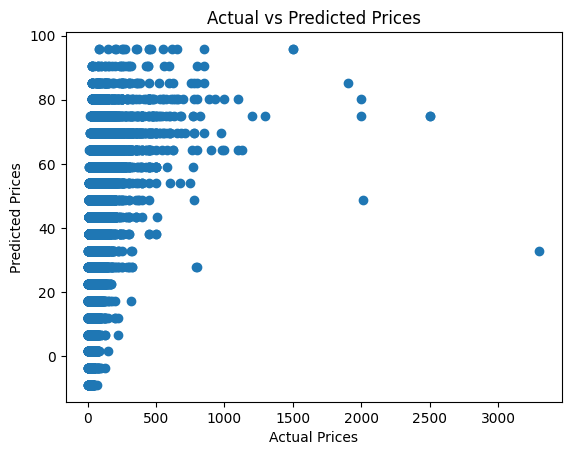

In [ ]:

# Linear regression: Predict 'price' based on 'points'
X = data_copy[['points']]
y = data_copy['price']
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

# Evaluation
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error of Linear Regression: {mse}")

# Plot actual vs predicted
print("Scatter plot of actual vs predicted prices:")
plt.scatter(y, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()
